In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [7]:
celltest = pd.read_csv('photocelltest.csv',delimiter=';', encoding='utf-16')


In [9]:
analog1 = celltest['ISO aux (V)']
analog2 = celltest['ISO aux (V).1']

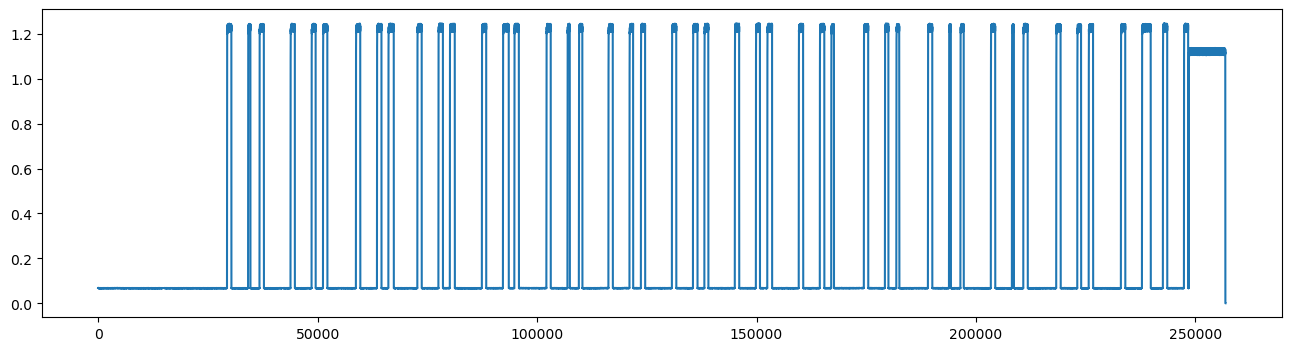

In [13]:
plt.figure(figsize = (16,4))
plt.plot(analog1)


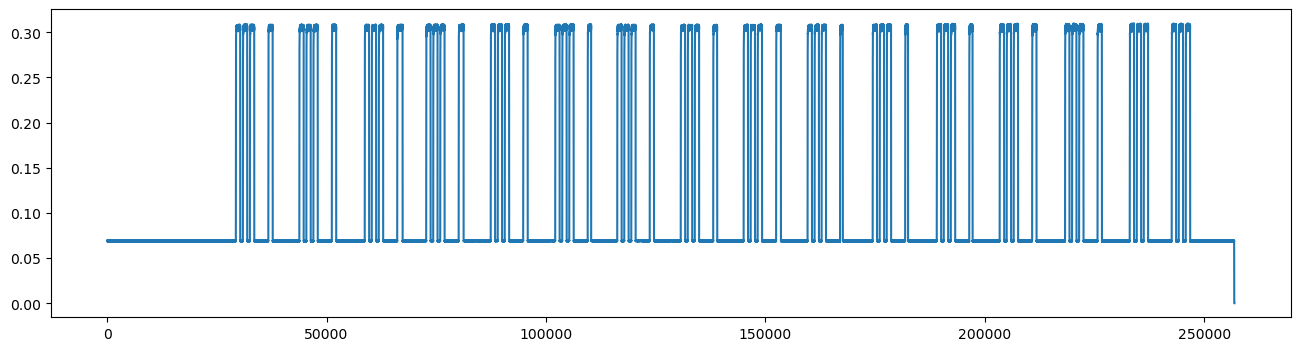

In [14]:
plt.figure(figsize = (16,4))
plt.plot(analog2)


I think you need analog1, but we should be able to make a nice function that handles this. 

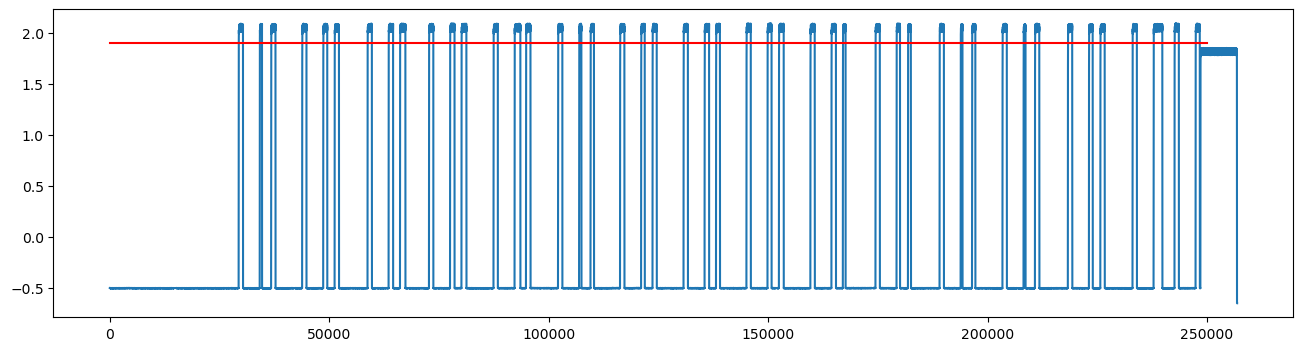

In [ ]:
plt.figure(figsize = (16,4))
plt.plot((analog1-np.mean(analog1))/np.std(analog1))
plt.plot([0,250000],[1.9,1.9],'r-')

In [37]:
threshold = 1.9
a1 = (analog1-np.mean(analog1))/np.std(analog1)
peaks = np.where(a1 > threshold)[0]
print(peaks)
peakdiff = np.diff(peaks)
onsets = peaks[np.where(peakdiff > 1)[0]+1] 
#need to add the first onset to the list 
onsets = np.insert(onsets,0,peaks[0])


[ 29383  29384  29385 ... 248336 248337 248338]


(0.0, 100000.0)

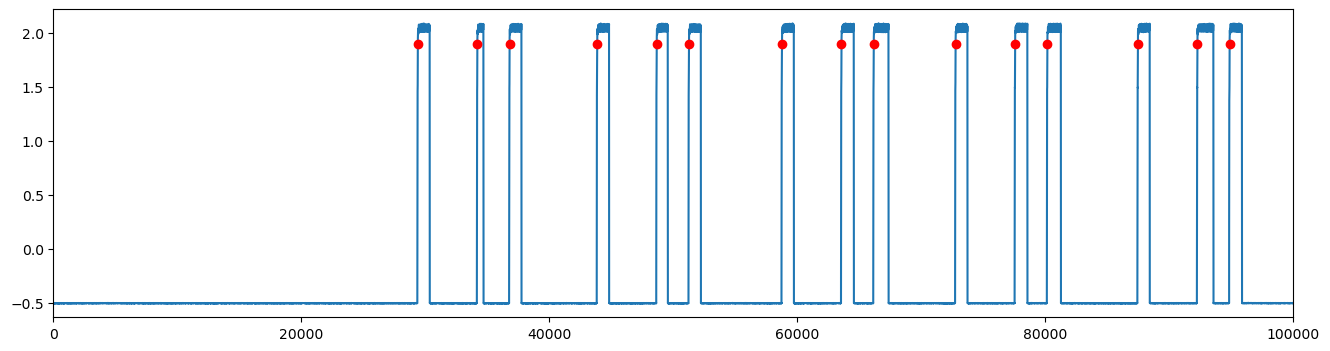

In [38]:
plt.figure(figsize = (16,4))
plt.plot(a1[0:100000])
plt.plot(onsets,threshold*np.ones(len(onsets)),'ro')
plt.xlim([0,100000])

I zoomed in on the first 100000 so you could see 

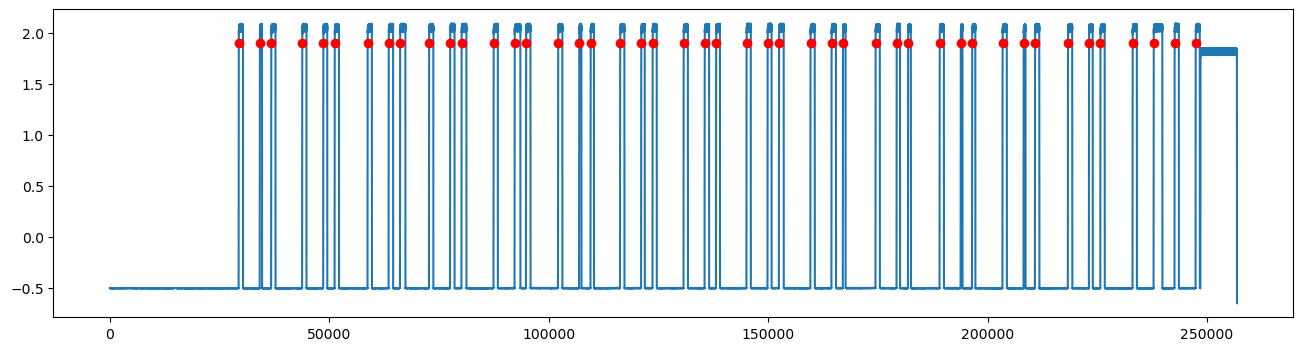

In [39]:
plt.figure(figsize = (16,4))
plt.plot(a1)
plt.plot(onsets,threshold*np.ones(len(onsets)),'ro')
